<a href="https://colab.research.google.com/github/athulskrish/pytorch_nn/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use this example - https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/ to understand pytorch NNs. Augment the dataset by perturbing the data fields with gaussian noise. Train/test/validate. Take a screencast walkthrough of the full code, including your understanding of how the NN is implemented.

In [63]:
#importing the libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

In [64]:
# load the dataset, split into input (X) and output (y) variables
dataset = np.loadtxt('/content/drive/MyDrive/datasets/pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8] #dividing the data into X,y with X having the 0-8 columns and y having the 9th column

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


print(dataset)
print(X.size())
print(y.size())

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
torch.Size([768, 8])
torch.Size([768, 1])


In [65]:

# define the model
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12) #first hidden layer with 8 input and 12 outputs
        self.act1 = nn.ReLU() # activation layer of first hidden layer
        self.hidden2 = nn.Linear(12, 8) #2nd hidden layer  with 12 input and 8 output
        self.act2 = nn.ReLU() #activation of second hidden layer
        self.output = nn.Linear(8, 1) #defining output with 8 input and 1 output
        self.act_output = nn.Sigmoid() #using the sigmoid to activate

    def forward(self, x):  #forward movement of the data through the hidden layers
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

model = PimaClassifier() #defining the object model of PimaClassifer
print(model)


PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [66]:

# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)#using the adam optimizer to optimize the model and defining learning rate

n_epochs = 100
batch_size = 20

losses=[]

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print(losses)

[1.2303582429885864, 0.8360600471496582, 0.6949877142906189, 0.7003495693206787, 0.591110110282898, 0.7138779163360596, 0.7330522537231445, 0.666092574596405, 0.7712942957878113, 0.8917008638381958, 0.7804543375968933, 0.7786320447921753, 0.656927764415741, 0.5455793142318726, 0.7045000791549683, 0.7910106182098389, 0.7491961717605591, 0.5449047088623047, 0.6537762880325317, 0.6660848259925842, 0.7402969002723694, 0.5516915917396545, 0.700057864189148, 0.4703025817871094, 0.6293670535087585, 0.6016066670417786, 0.548128604888916, 0.5508869290351868, 0.589006245136261, 0.7350146770477295, 0.6572950482368469, 0.5083547830581665, 0.6467710733413696, 0.7682667374610901, 0.6595326662063599, 0.7683153748512268, 0.6345949769020081, 0.7651044130325317, 0.5577050447463989, 0.744359016418457, 0.7028721570968628, 0.6031957864761353, 0.658568799495697, 0.568680465221405, 0.5976877212524414, 0.671798825263977, 0.7177926898002625, 0.7117986083030701, 0.6814040541648865, 0.6776337027549744, 0.7558681

Plotting the graph

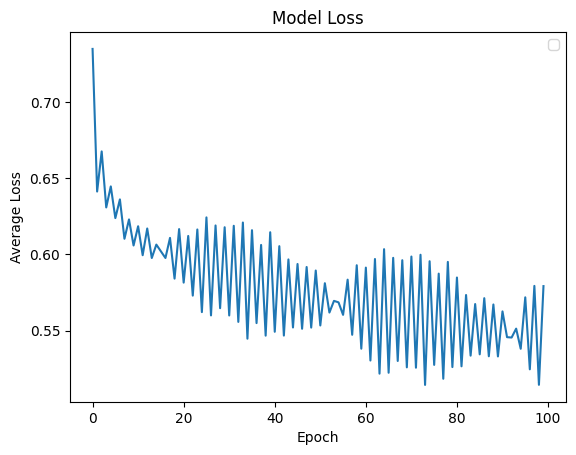

In [67]:
# Calculate the average loss for each epoch
epoch_losses = []
for i in range(n_epochs):
    epoch_loss = sum(losses[i*batch_size:(i+1)*batch_size]) / batch_size
    epoch_losses.append(epoch_loss)
# epoch_loss=losses.
# Plot the average loss for each epoch
plt.plot(range(n_epochs), epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [68]:

# compute accuracy
y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy*100}")

# make class predictions with the model
predictions = (model(X) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Accuracy 74.86979675292969
[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 1 (expected 1)


Including train,test, validate

In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.2,random_state=66)


Including validation as 25% of the training data set

In [70]:
X_train,X_val, y_train,y_val=train_test_split(X,y,stratify=y,test_size=0.25, random_state=66)

INcluding noise

In [71]:
import random
X_deviation=0.3  #defining the deviation
noise_X= torch.randn(tuple(X.size()))*X_deviation  #creating a random data based on the X and Y with deviation
noise_y_tensor=torch.randn(tuple(y.size()))

# X_noisy=X+noise_X
# y_noisy=y+noise_y
sigmoid=nn.Sigmoid()
print(y_train[:5])
noise_y=sigmoid(noise_y_tensor)
binary_noise_y = torch.where(noise_y >= 0.5, torch.tensor(1), torch.tensor(0))


print(binary_noise_y[:5])



tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.]])
tensor([[1],
        [0],
        [1],
        [1],
        [1]])


appending the noisy data

In [72]:
import random
X_new = torch.cat((X, noise_X.squeeze(0)), dim=0) #concatinating the noisy and data
y_new =torch.cat((y,noise_y.squeeze(0)), dim =0)
# X_new=random.shuffle(X_new)
print(X_new.size())
print(y_new.size())
y_new=y_new.reshape(-1, 1)

# for y in y_new
#   if y>0.5 :
#   y_new=1
# else:
#   y_new=0




torch.Size([1536, 8])
torch.Size([1536, 1])


In [73]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,  test_size=0.2,random_state=66)

In [74]:
# print("X_train",X_train)
# print("y_train",y_train)
# print("X_test",X_test)
# print("y_test",y_test)


In [75]:

#new model

new_model=PimaClassifier()
print(new_model)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [76]:
# train the model
loss_fn   = nn.BCELoss(reduction ='mean')  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.01)#using the adam optimizer to optimize the model and defining learning rate

n_epochs = 200
batch_size = 20

losses=[]

for epoch in range(n_epochs):
    for i in range(0, len(X_train), batch_size):
      # Xbatch = X_train[i:i+batch_size]
        y_pred = new_model(X_train)
      #  ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, y_train)

        # loss = loss_fn(y_pred, y_train)
        losses.append(loss.detach())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [77]:
#
# compute accuracy
y_pred = new_model(X_test)
accuracy = (y_pred.round() == y_test).float().mean()
print(f"Accuracy {accuracy*100}")

# make class predictions with the model
predictions = (new_model(X_new) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Accuracy 30.844154357910156
[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 0 (expected 1)


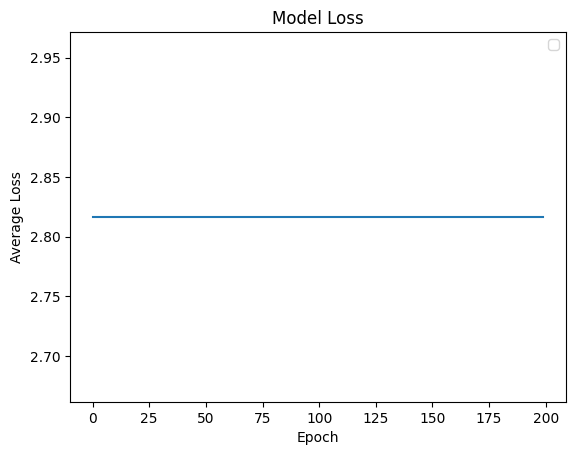

In [78]:
# Calculate the average loss for each epoch
epoch_losses = []
for i in range(n_epochs):
    epoch_loss = sum(losses[i*batch_size:(i+1)*batch_size]) / batch_size
    epoch_losses.append(epoch_loss)
# epoch_loss=losses.
# Plot the average loss for each epoch
plt.plot(range(n_epochs), epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Model Loss')
plt.legend()
plt.show()